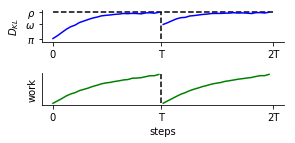

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# without velocity randomization
np.random.seed(0)

figsize = (6*0.7,3*0.7)
plt.figure(figsize=figsize)

protocol_length = 25
x_1 = np.arange(protocol_length)
x_2 = np.arange(protocol_length) + protocol_length

eps_scale = 0.01
distance_1 = np.tanh(x_1 / (protocol_length/3)) + eps_scale * np.random.randn(protocol_length)
distance_2 = np.tanh(x_2 / (protocol_length/3)) + eps_scale * np.random.randn(protocol_length)


work_1 = distance_1 + np.arange(protocol_length) / protocol_length + eps_scale * np.random.randn(protocol_length)
work_2 = np.arange(protocol_length)/ protocol_length + eps_scale * np.random.randn(protocol_length)

KL_div_rho_to_pi = max(distance_1)

distance_color = 'blue'
work_color = 'green'


def cartoon_plot_distance(ax):
    #ax.set_title("Work")
    ax.plot(x_1, distance_1, color=distance_color)
    plt.vlines(x_2[0] - 0.5, 0, KL_div_rho_to_pi, linestyles='--')
    ax.plot(x_2, distance_2, color=distance_color)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.yticks([])
    plt.yticks([0, KL_div_rho_to_pi], [r"$\pi$", r"$\rho$"])
    plt.ylim([-0.1, KL_div_rho_to_pi + 0.1])
    plt.ylabel(r"$D_{KL}$")
    plt.hlines(KL_div_rho_to_pi, 0, protocol_length*2, linestyles='--')

def cartoon_plot_work(ax):
    #ax.set_title("Work")
    ax.plot(x_1, work_1, color=work_color)
    plt.vlines(x_2[0] - 0.5, 0, work_1[-1], linestyles='--')
    ax.plot(x_2, work_2, color=work_color)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.yticks([])
    plt.xticks([0, protocol_length - 0.5, 2 * protocol_length], ["0", "T", "2T"])
    plt.xlabel("steps")#, horizontalalignment="right") # doesn't seem to do anything?
    plt.ylabel("work")


ax1 = plt.subplot(2,1,1)
cartoon_plot_distance(ax1)

ax2 = plt.subplot(2,1,2, sharex=ax1)
cartoon_plot_work(ax2)

plt.tight_layout()
plt.savefig("near_eq_cartoon.pdf", dpi=300)
plt.close()



# with velocity randomization
np.random.seed(0)
plt.figure(figsize=figsize)

x_1 = np.arange(protocol_length)
x_2 = np.arange(protocol_length) + protocol_length

distance_2 = np.tanh((x_1 + protocol_length/5) / (protocol_length/3)) + eps_scale * np.random.randn(protocol_length)


work_1 = distance_1 + np.arange(protocol_length) / protocol_length + eps_scale * np.random.randn(protocol_length)
work_2 = distance_1 + np.arange(protocol_length)/ protocol_length + eps_scale * np.random.randn(protocol_length)

KL_div_rho_to_pi = max(distance_1)

distance_color = 'blue'
work_color = 'green'


def cartoon_plot_distance(ax):
    #ax.set_title("Work")
    ax.plot(x_1, distance_1, color=distance_color)
    plt.vlines(x_2[0] - 0.5, 0, KL_div_rho_to_pi, linestyles='--')
    ax.plot(x_2, distance_2, color=distance_color)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.yticks([])
    plt.yticks([0, distance_2[0], KL_div_rho_to_pi], [r"$\pi$", r"$\omega$", r"$\rho$"])
    plt.ylim([-0.1, KL_div_rho_to_pi + 0.1])
    plt.ylabel(r"$D_{KL}$")
    plt.hlines(KL_div_rho_to_pi, 0, protocol_length*2, linestyles='--')

def cartoon_plot_work(ax):
    ax.plot(x_1, work_1, color=work_color)
    plt.vlines(x_2[0] - 0.5, 0, work_1[-1], linestyles='--')
    ax.plot(x_2, work_2, color=work_color)
    
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.yticks([])
    plt.xticks([0, protocol_length - 0.5, 2 * protocol_length], ["0", "T", "2T"])
    plt.xlabel("steps")#, horizontalalignment="right") # doesn't seem to do anything?
    plt.ylabel("work")


ax1 = plt.subplot(2,1,1)
cartoon_plot_distance(ax1)

ax2 = plt.subplot(2,1,2, sharex=ax1)
cartoon_plot_work(ax2)

plt.tight_layout()
plt.savefig("near_eq_cartoon-vrand.pdf", dpi=300)